In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


set up the Kaggle API credentials for accessing Kaggle datasets

DATASET Link :https://www.kaggle.com/datasets/googolples/cat-dog-images/versions/1?resource=download-directory





In [2]:
!kaggle datasets download -d googolples/cat-dog-images

cat-dog-images.zip: Skipping, found more recently modified local copy (use --force to force download)


ZIP FILE EXTRACTING


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-dog-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import cv2
import pickle
import os
import matplotlib.pyplot as plt
import random


In [5]:
directory=r'/content/dataset'
categ=['cat','dog']

list

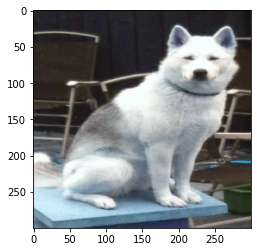

In [44]:
img_size=300
data=[]
for cate in categ:
    folder=os.path.join(directory,cate)
    #print(folder)
    label=categ.index(cate)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
#         print(img_path)
#         break;
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(img_size,img_size))
        data.append([img_arr,label])
        plt.imshow(img_arr)
        break;

In [48]:
data[0]

[array([[[ 90, 116, 132],
         [ 91, 118, 133],
         [ 94, 120, 136],
         ...,
         [225, 231, 236],
         [227, 233, 238],
         [229, 235, 241]],
 
        [[ 90, 116, 132],
         [ 91, 117, 133],
         [ 93, 120, 135],
         ...,
         [225, 232, 237],
         [227, 233, 238],
         [229, 235, 241]],
 
        [[ 90, 116, 132],
         [ 91, 117, 133],
         [ 93, 119, 135],
         ...,
         [227, 233, 238],
         [228, 233, 238],
         [229, 235, 242]],
 
        ...,
 
        [[ 60,  87, 102],
         [ 60,  87, 103],
         [ 61,  88, 104],
         ...,
         [ 39,  57,  71],
         [ 30,  47,  60],
         [ 29,  43,  57]],
 
        [[ 59,  87, 103],
         [ 59,  88, 103],
         [ 60,  89, 104],
         ...,
         [ 42,  61,  75],
         [ 32,  50,  63],
         [ 19,  32,  46]],
 
        [[ 59,  88, 103],
         [ 59,  88, 103],
         [ 60,  89, 104],
         ...,
         [ 43,  62,  76],
  

In [7]:
random.shuffle(data)

In [8]:
x=[]
y=[]
for features,labels in data:
    x.append(features)
    y.append(labels)

In [9]:
x=np.array(x)
y=np.array(y)

In [10]:
x=x/255

In [51]:
x.shape

(2000, 300, 300, 3)

In [11]:

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [12]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:],activation='relu'))
model.add(Dense(2,activation='softmax'))

In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x,y,epochs=7,validation_split=0.2)

Epoch 1/9
50/50 [==============================] - 20s 156ms/step - loss: 1.5609 - accuracy: 0.5625 - val_loss: 0.6795 - val_accuracy: 0.6100
Epoch 2/9
50/50 [==============================] - 6s 121ms/step - loss: 0.6621 - accuracy: 0.6450 - val_loss: 0.6524 - val_accuracy: 0.6050
Epoch 3/9
50/50 [==============================] - 6s 120ms/step - loss: 0.5504 - accuracy: 0.7444 - val_loss: 0.6892 - val_accuracy: 0.6350
Epoch 4/9
50/50 [==============================] - 6s 121ms/step - loss: 0.3270 - accuracy: 0.8681 - val_loss: 0.9160 - val_accuracy: 0.5950
Epoch 5/9
50/50 [==============================] - 6s 124ms/step - loss: 0.1526 - accuracy: 0.9569 - val_loss: 1.1036 - val_accuracy: 0.5975
Epoch 6/9
50/50 [==============================] - 6s 129ms/step - loss: 0.0878 - accuracy: 0.9781 - val_loss: 1.3381 - val_accuracy: 0.6175
Epoch 7/9
50/50 [==============================] - 8s 159ms/step - loss: 0.0367 - accuracy: 0.9937 - val_loss: 1.6364 - val_accuracy: 0.6125
Epoch 8/9
50

In [15]:

def load_prep(filename,image_shape=300):
  img=cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
  img=cv2.resize(img,(image_shape,image_shape))
  img=img/255
  return img

In [16]:
import matplotlib.pyplot as plt
import tensorflow as tf
def prep_and_plot(model,filename,classs):
  img=load_prep(filename)
  pred=model.predict(tf.expand_dims(img,axis=0))
  pred_class=classs[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction : {pred_class}")
  plt.axis(False)

--2023-03-04 13:40:53--  https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg
Resolving www.alleycat.org (www.alleycat.org)... 141.193.213.20, 141.193.213.21
Connecting to www.alleycat.org (www.alleycat.org)|141.193.213.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107329 (105K) [image/jpeg]
Saving to: ‘img.jpg’

img.jpg             100%[===================>] 104.81K  --.-KB/s    in 0.02s   

2023-03-04 13:40:54 (6.16 MB/s) - ‘img.jpg’ saved [107329/107329]

1/1 [==============================] - 0s 23ms/step


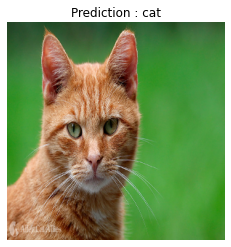

In [37]:
!wget -O img.jpg https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg
prep_and_plot(model, 'img.jpg', categ)

 cat image 1 : https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_2x3.jpg
 cat image 2 : https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg

dog image 1: https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg

dog image 2 : https://images.unsplash.com/photo-1611003228941-98852ba62227?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8YmFieSUyMGRvZ3xlbnwwfHwwfHw%3D&w=1000&q=80

dogimage 3 : https://cdn.pixabay.com/photo/2019/05/23/19/29/dog-4224638__340.jpg